In [7]:
import argparse
from pprint import pp
import torch
from torch import nn
from tqdm import tqdm
import numpy as np
import json
import os
from omegaconf import OmegaConf
from torch.utils.tensorboard import SummaryWriter

from utils import load_dataset, load_config
from utils import get_model
from utils import get_loss_hparams_and_lr, get_loss
from utils import trainer
from utils import utils
import matplotlib.pyplot as plt

In [8]:
#set torch device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


#code in this file will serve as a denoising test of the trained ne_lpn model

dataset_config_path = "../exps/mnist/configs/mnist/test_dataset.json"


In [9]:
def run_test(network_type, shift_factor, model_path, dataset_config_path, model_weight_path):
    # load model and dataset
    model_config = load_config(model_path)
    model = get_model(model_config)
    model.load_state_dict(torch.load(model_weight_path)["model_state_dict"])

    dataset_config = load_config(dataset_config_path)
    test_dataset = load_dataset(dataset_config, "test")

    #get the data loader
    test_data_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=1, shuffle=False, num_workers=4
    )

    for step, batch in enumerate(test_data_loader):
        # get first image from the test data loader
        clean_image = batch["image"].to(device)
        clean_image_mean = torch.mean(clean_image)
        clean_image = clean_image - clean_image_mean
        output_clean = model(clean_image)
        output_clean = output_clean + clean_image_mean
    
        # shift all values in clean_image by shift_factor by adding tensor of shift_factor
        shift_tensor = torch.full_like(clean_image, shift_factor)
        shifted_image = clean_image + shift_tensor
        output_shifted = model(shifted_image)

        if step == 0:
            #plot the four images ( using matplotlib
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].imshow(clean_image[0][0].cpu().detach().numpy(), cmap='gray', vmin=0, vmax=1)
            axs[0, 0].set_title('Input Image Unshifted')
            axs[0, 0].axis('off')
            axs[0, 1].imshow(output_clean[0][0].cpu().detach().numpy(), cmap='gray', vmin=0, vmax=1)
            axs[0, 1].set_title('Model Output from Clean Image')
            axs[0, 1].axis('off')
            axs[1, 0].imshow(shifted_image[0][0].cpu().detach().numpy(), cmap='gray', vmin=0, vmax=1)
            axs[1, 0].set_title('Input Image Shifted')
            axs[1, 0].axis('off')
            axs[1, 1].imshow(output_shifted[0][0].cpu().detach().numpy(), cmap='gray', vmin=0, vmax=1)
            axs[1, 1].set_title('Model Output from Shifted Image')
            axs[1, 1].axis('off')
        
            loss = nn.MSELoss()
    
            output_clean_shifted = output_clean + shift_tensor
            mse_loss = loss(output_clean_shifted, output_shifted)
        
            print(f"mse loss: {mse_loss}")
    
            #below the plot show the mse of the shifted output vs the unshifted output plus the shit factor
            plt.suptitle(f"Network: {network_type} | Shift factor: {shift_factor}")
        
            # show the text below the plot
            if mse_loss.item() < 0.0001:
                rounded_loss = f"{mse_loss.item():.4e}"
            else:
                rounded_loss = f"{mse_loss.item():.4f}"
            plt.text(0.5, -0.2, f"MSE between shifted output and unshifted output plus shift factor: {rounded_loss}", horizontalalignment='center', verticalalignment='center', transform=axs[1, 1].transAxes)
            #show the plot
            plt.show()

            #save the plot 
            network_dir = os.path.join("shift_experiment", network_type)
            if not os.path.exists(network_dir):
                os.makedirs(network_dir)

            fig.savefig(os.path.join(network_dir, f"shift_{shift_factor}.png"))

            break
                     
                    

In [10]:
model_config_paths = {
    "ne": "../exps/mnist/configs/mnist/model_ne.json",
    "lpn": "../exps/mnist/configs/mnist/model.json",
    "ne_no_affine": "../exps/mnist/configs/mnist/model_ne_mnist_no_affine.json",
    "ne_no_aff_z": "../exps/mnist/configs/mnist/model_ne_mnist_no_affine_z_scored.json",
    "ne_aff_z": "../exps/mnist/configs/mnist/model_ne_mnist_affine_z_scored.json"
}

model_weight_paths = {
    "ne": "../exps/mnist/experiments/ne_mnist/model.pt",
    "lpn": "../exps/mnist/experiments/mnist/model.pt",
    "ne_no_affine": "../exps/mnist/experiments/ne_mnist_no_affine/model.pt",
    "ne_no_aff_z": "../exps/mnist/experiments/ne_mnist_no_affine_z_scored/model.pt",
    "ne_aff_z": "../exps/mnist/experiments/ne_mnist_affine_z_scored/model.pt"
}

dataset_config_path = "../exps/mnist/configs/mnist/test_dataset.json"

In [11]:
shift_factors =  [0.1, 0.2, 0.3, 0.4, 0.5]

init weights
dataset:  mnist
mse loss: 0.042352765798568726


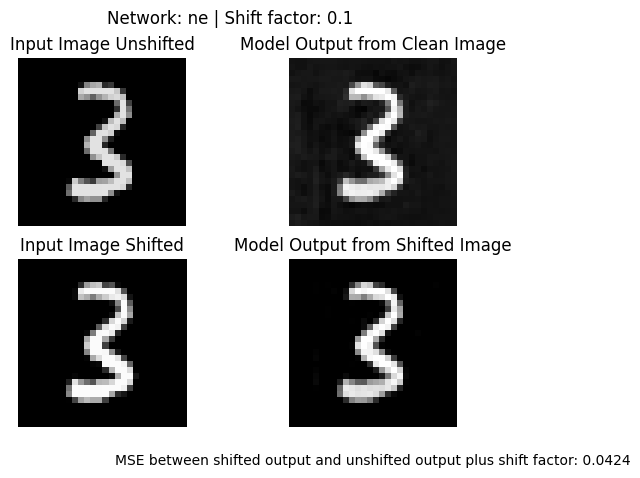

init weights
dataset:  mnist
mse loss: 0.039273228496313095


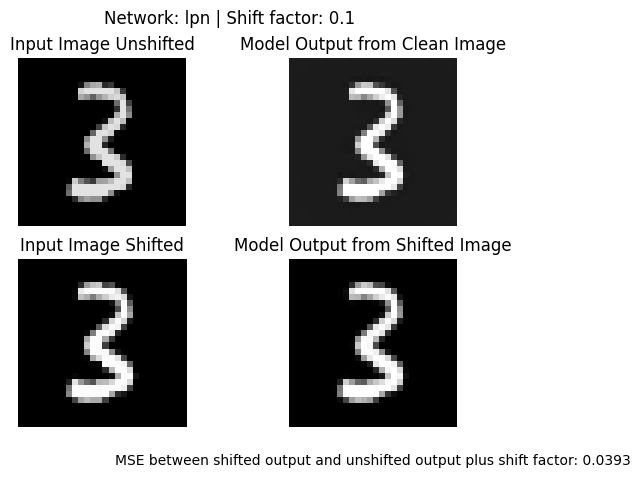

init weights
dataset:  mnist
mse loss: 0.06299928575754166


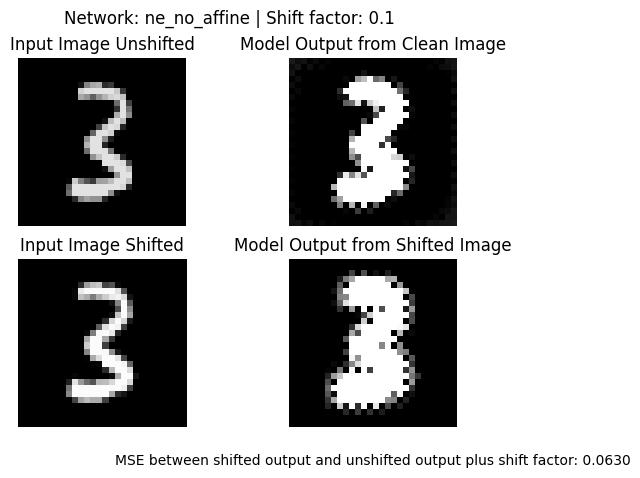

init weights
dataset:  mnist
mse loss: 0.012538354843854904


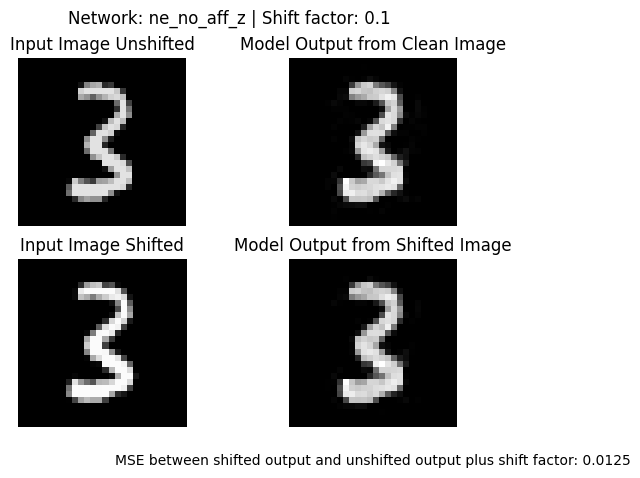

init weights
dataset:  mnist
mse loss: 0.0907212346792221


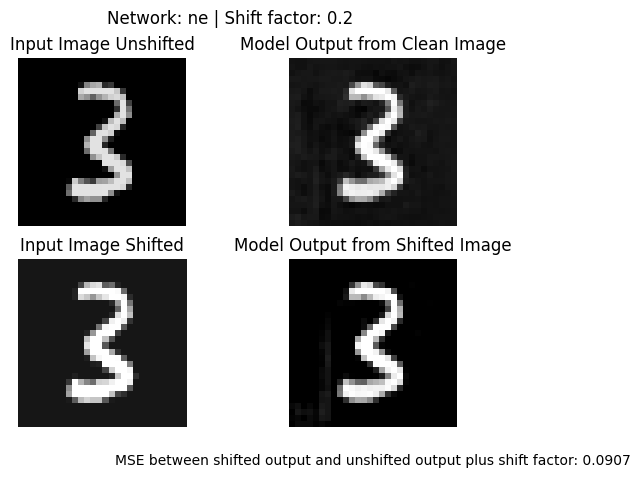

init weights
dataset:  mnist
mse loss: 0.07926565408706665


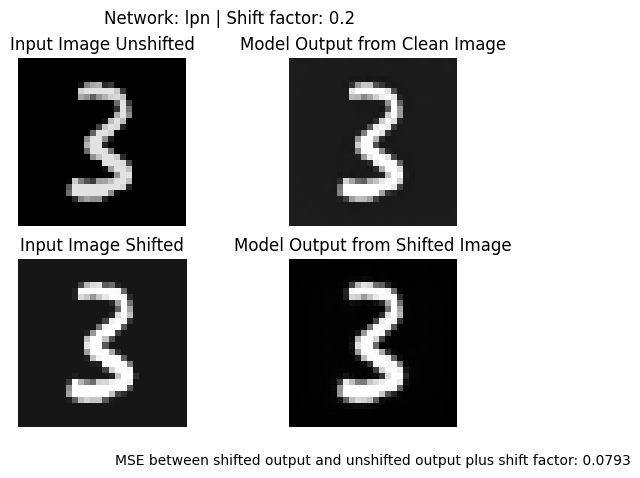

init weights
dataset:  mnist
mse loss: 1.9767518043518066


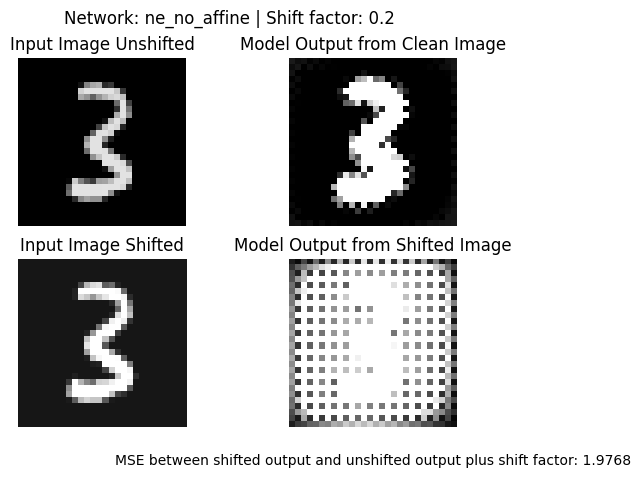

init weights
dataset:  mnist
mse loss: 0.012538357637822628


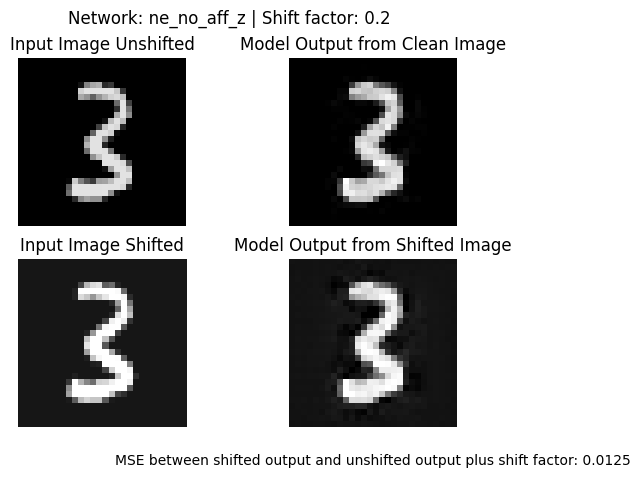

init weights
dataset:  mnist
mse loss: 0.15598177909851074


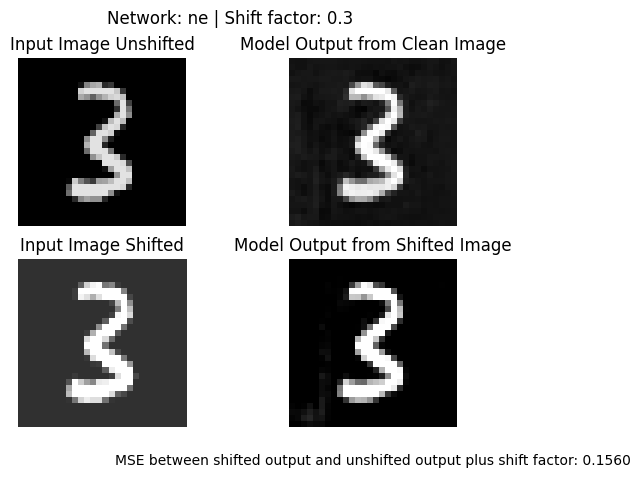

init weights
dataset:  mnist
mse loss: 0.12417174130678177


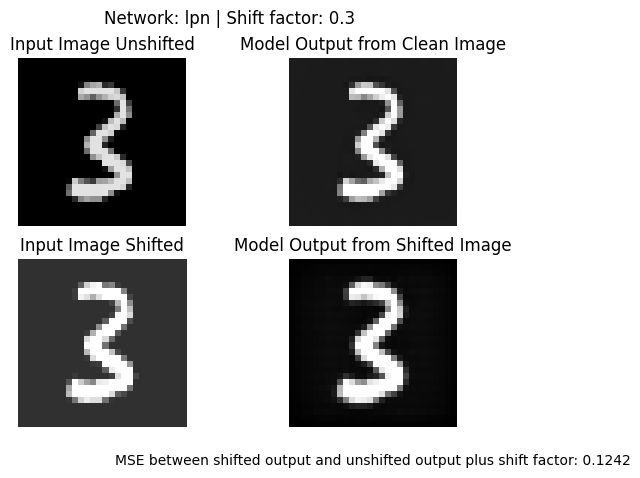

init weights
dataset:  mnist
mse loss: 3.6140809059143066


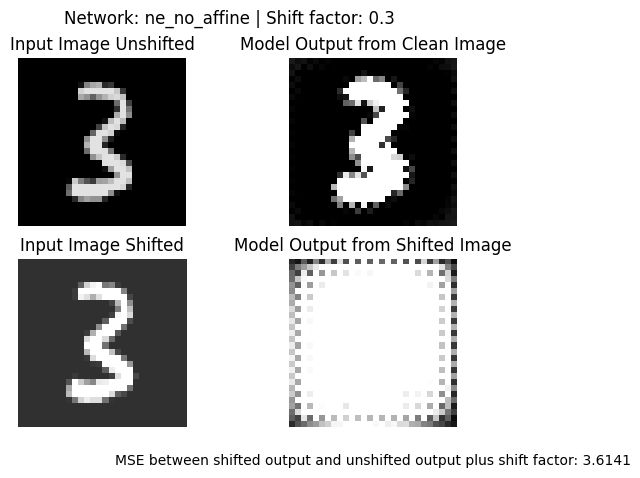

init weights
dataset:  mnist
mse loss: 0.012538360431790352


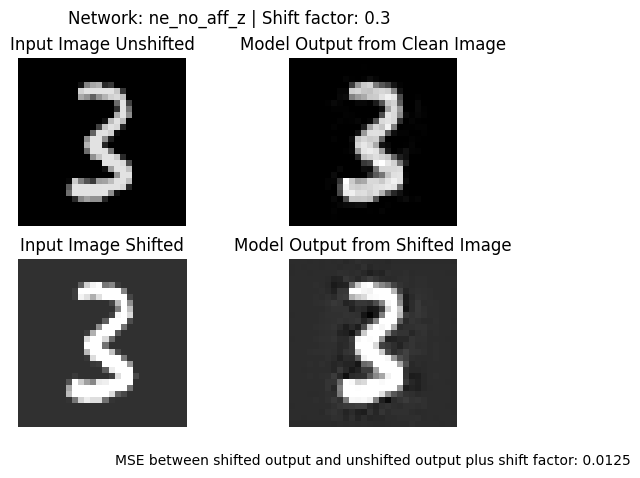

init weights
dataset:  mnist
mse loss: 0.23840941488742828


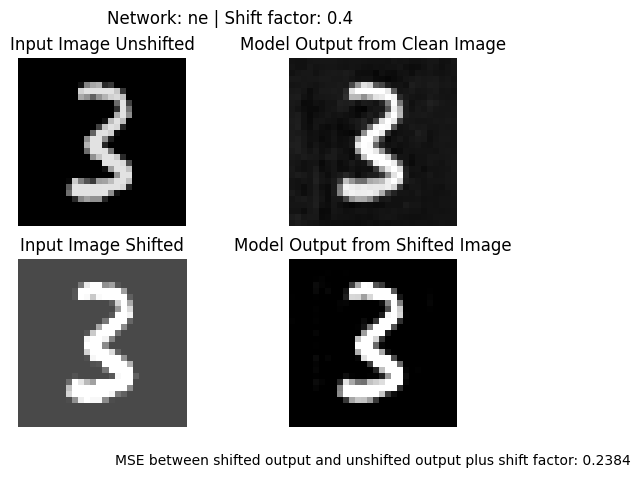

init weights
dataset:  mnist
mse loss: 0.1322447955608368


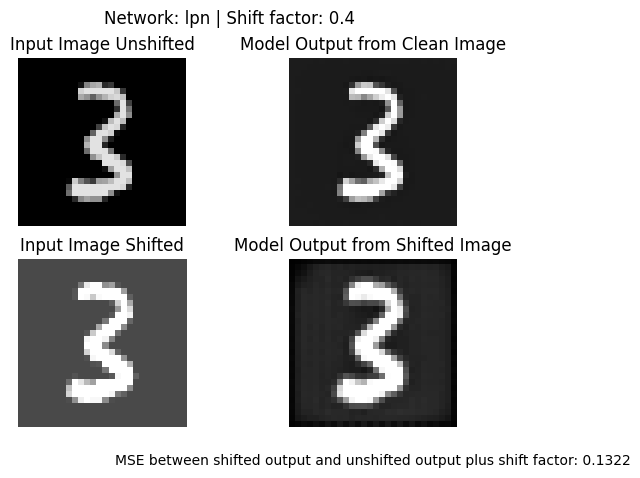

init weights
dataset:  mnist
mse loss: 4.7103352546691895


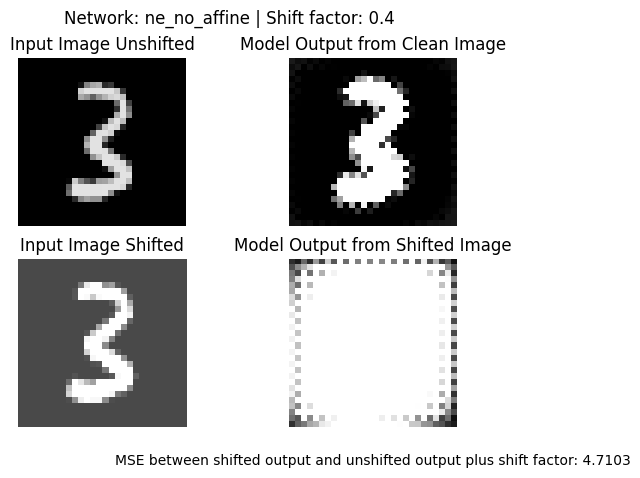

init weights
dataset:  mnist
mse loss: 0.012538352981209755


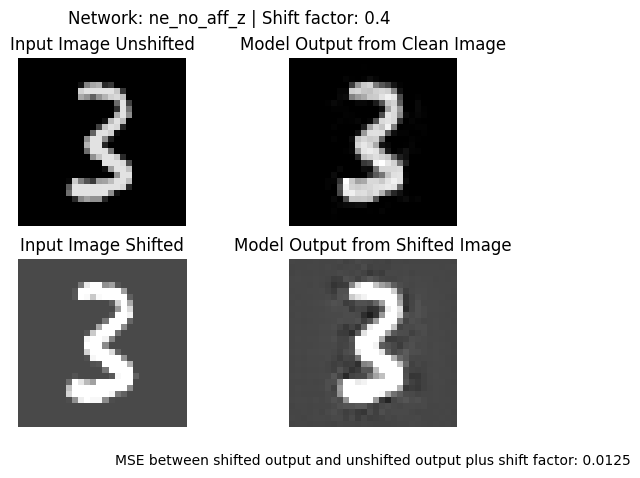

init weights
dataset:  mnist
mse loss: 0.34046974778175354


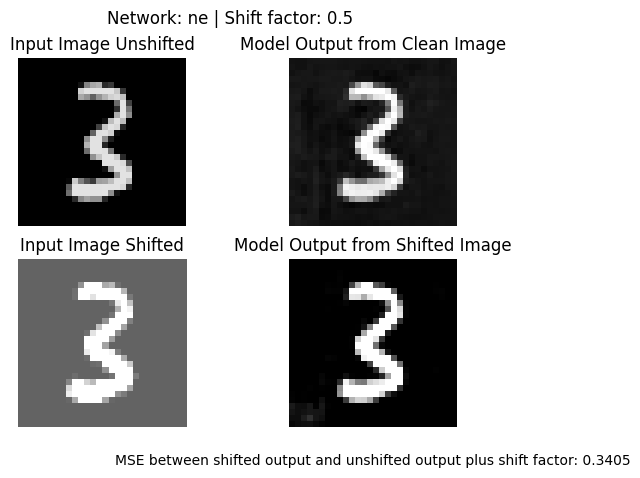

init weights
dataset:  mnist
mse loss: 0.10186851024627686


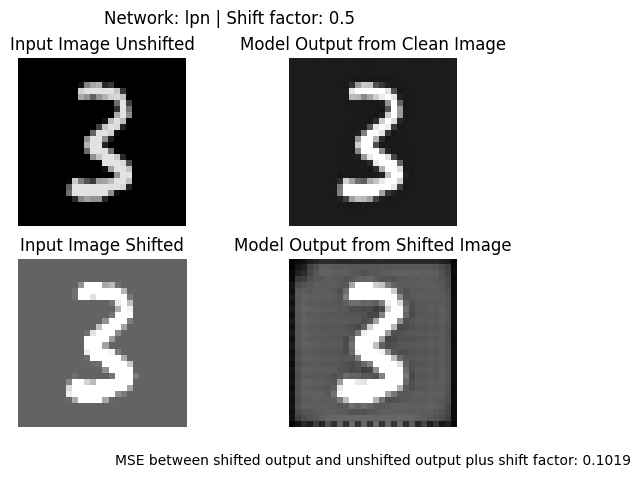

init weights
dataset:  mnist
mse loss: 5.835404396057129


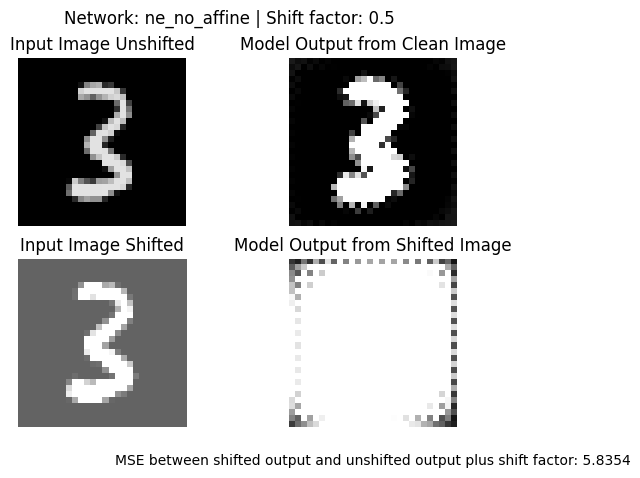

init weights
dataset:  mnist
mse loss: 0.012538350187242031


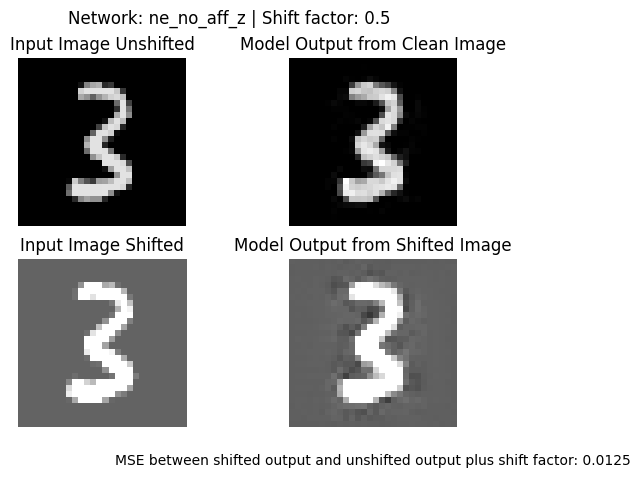

In [12]:
for shift in shift_factors:
    for network_type in model_config_paths:
        run_test(network_type, shift, model_config_paths[network_type], dataset_config_path, model_weight_paths[network_type])